In [1]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# matplotlib for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn models and functions
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import tree, naive_bayes

# xgboost for classification
from xgboost import XGBClassifier


In [2]:
pd.set_option('display.max_columns', None) # set no limit for number of displayed columns.

In [3]:
df_cleaned = pd.read_csv('Fifa24PLayers_beforefss.csv')

In [4]:
df_cleaned.head()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,work_rate_attacking,work_rate_defending
0,91,94,181500000.0,230000.0,24,182,75,73,16,1,1,7,1909,2024.0,18,1,4,5,5,9,349400000.0,97,90,80,92,36,78,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88,26,34,32,13,5,7,11,6,15,90,90,90,91,91,91,91,91,89,89,89,89,81,81,81,89,68,63,63,63,68,63,54,54,54,63,18,2,0
1,91,94,185000000.0,340000.0,22,195,94,10,13,1,1,9,448,2027.0,36,0,3,3,5,9,356100000.0,89,93,66,80,45,88,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87,38,47,29,7,14,13,11,7,15,90,90,90,82,86,86,86,82,82,82,82,79,74,74,74,79,62,63,63,63,62,60,62,62,62,60,19,2,1
2,91,91,103000000.0,350000.0,32,181,75,10,13,1,2,17,2945,2025.0,7,1,5,4,5,9,190600000.0,72,88,94,87,65,78,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88,66,70,53,15,13,5,10,13,15,83,83,83,87,88,88,88,87,89,89,89,88,90,90,90,88,79,80,80,80,79,75,70,70,70,75,21,2,1
3,90,90,41000000.0,23000.0,36,169,67,112893,39,1,3,10,68,2025.0,52,0,4,4,5,9,61500000.0,80,87,90,94,33,64,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96,20,35,24,6,11,15,14,8,15,85,85,85,90,89,89,89,90,91,91,91,89,85,85,85,89,64,63,63,63,64,59,49,49,49,59,19,0,0
4,90,90,51000000.0,95000.0,35,185,81,607,350,1,3,9,83,2026.0,18,1,4,4,5,4,81600000.0,79,88,83,87,39,78,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90,43,24,18,13,11,5,5,7,15,88,88,88,86,89,89,89,86,88,88,88,86,82,82,82,86,64,64,64,64,64,60,55,55,55,60,18,1,1


In [5]:
df_cleaned.describe()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,work_rate_attacking,work_rate_defending
count,18350.000000,18350.000000,1.835000e+04,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,1.835000e+04,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.00000,18350.00000,18350.00000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000
mean,65.817057,71.088065,2.837585e+06,8723.388819,25.267139,181.698747,75.210354,47849.515749,311.365559,1.390572,6.505668,21.498801,662.654714,2024.886703,56.380163,0.756240,2.941417,2.386594,1.088065,5.252262,5.367958e+06,64.680981,48.839564,53.869046,58.956839,47.959619,64.285177,49.291499,46.294005,51.794441,59.059946,42.435749,55.951717,47.750518,42.736240,53.639346,58.632425,64.583052,64.753406,63.414332,61.670354,64.030027,57.626757,65.729155,62.863869,64.906267,46.634060,55.808174,46.908774,50.479128,54.246649,47.795804,57.976240,46.666975,48.532534,46.336240,16.329373,16.124578,16.035095,16.168392,16.423815,17.257166,54.826104,54.826104,54.826104,55.836458,55.748883,55.748883,55.748883,55.836458,56.12158,56.12158,56.12158,56.603815,55.499346,55.499346,55.499346,56.603815,54.315477,54.049482,54.049482,54.049482,54.315477,53.662888,52.746158,52.746158,52.746158,53.662888,21.250518,1.216512,1.087302
std,6.817917,6.220982,7.542158e+06,18662.835636,4.757756,6.869995,6.985703,54284.336476,612.567873,0.757896,3.968175,18.466189,731.838778,1.303260,49.443798,0.429361,0.680378,0.775725,0.364488,1.810122,1.440055e+07,14.970468,16.833865,13.841603,14.125636,19.091136,10.163181,17.828376,19.729039,17.296979,14.326221,17.593028,18.774825,17.896451,16.891964,14.652211,16.651090,15.378635,15.150145,15.012188,8.927546,14.579914,13.016983,11.868633,16.359399,12.632410,19.391332,16.797121,20.698963,19.736859,13.470163,15.710041,12.137094,20.415339,21.046124,20.569969,17.572154,16.945031,16.699136,17.093683,17.880726,7.288267,13.662532,13.662532,13.662532,14.722144,14.297568,14.297568,14.297568,14.722144,14.10367,14.10367,14.10367,14.163

In [8]:
max(df_cleaned.isna().sum())

0

In [9]:
def drop_cols(columns) : 
    to_drop = []
    for col in columns : 
        if col in df_cleaned.columns : 
            to_drop.append(col)
    if to_drop!=[]  :
        print(f" awww to drop is {to_drop}") 
        df_cleaned.drop(columns = to_drop, inplace=True)
            

In [10]:
df_cleaned.head()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,work_rate_attacking,work_rate_defending
0,91,94,181500000.0,230000.0,24,182,75,73,16,1,1,7,1909,2024.0,18,1,4,5,5,9,349400000.0,97,90,80,92,36,78,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88,26,34,32,13,5,7,11,6,15,90,90,90,91,91,91,91,91,89,89,89,89,81,81,81,89,68,63,63,63,68,63,54,54,54,63,18,2,0
1,91,94,185000000.0,340000.0,22,195,94,10,13,1,1,9,448,2027.0,36,0,3,3,5,9,356100000.0,89,93,66,80,45,88,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87,38,47,29,7,14,13,11,7,15,90,90,90,82,86,86,86,82,82,82,82,79,74,74,74,79,62,63,63,63,62,60,62,62,62,60,19,2,1
2,91,91,103000000.0,350000.0,32,181,75,10,13,1,2,17,2945,2025.0,7,1,5,4,5,9,190600000.0,72,88,94,87,65,78,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88,66,70,53,15,13,5,10,13,15,83,83,83,87,88,88,88,87,89,89,89,88,90,90,90,88,79,80,80,80,79,75,70,70,70,75,21,2,1
3,90,90,41000000.0,23000.0,36,169,67,112893,39,1,3,10,68,2025.0,52,0,4,4,5,9,61500000.0,80,87,90,94,33,64,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96,20,35,24,6,11,15,14,8,15,85,85,85,90,89,89,89,90,91,91,91,89,85,85,85,89,64,63,63,63,64,59,49,49,49,59,19,0,0
4,90,90,51000000.0,95000.0,35,185,81,607,350,1,3,9,83,2026.0,18,1,4,4,5,4,81600000.0,79,88,83,87,39,78,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90,43,24,18,13,11,5,5,7,15,88,88,88,86,89,89,89,86,88,88,88,86,82,82,82,86,64,64,64,64,64,60,55,55,55,60,18,1,1


In [11]:
df_cleaned.columns

Index(['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm',
       'weight_kg', 'club_team_id', 'league_id', 'league_level',
       'club_position', 'club_jersey_number', 'club_joined_date',
       'club_contract_valid_until_year', 'nationality_id', 'preferred_foot',
       'weak_foot', 'skill_moves', 'international_reputation', 'body_type',
       'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'men

In [12]:
drop_cols(columns = ['club_jersey_number', 'international_reputation', 
                     'nationality_id', 'club_team_id', 'body_type', 'weak_foot',
                            'preferred_foot', 'club_contract_valid_until_year', 
                     'league_level', 'league_id' , 'club_joined_date', 'release_clause_eur'])
df_cleaned

 awww to drop is ['club_jersey_number', 'international_reputation', 'nationality_id', 'club_team_id', 'body_type', 'weak_foot', 'preferred_foot', 'club_contract_valid_until_year', 'league_level', 'league_id', 'club_joined_date', 'release_clause_eur']


,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_position,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,work_rate_attacking,work_rate_defending
0,91,94,181500000.0,230000.0,24,182,75,1,5,97,90,80,92,36,78,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88,26,34,32,13,5,7,11,6,15,90,90,90,91,91,91,91,91,89,89,89,89,81,81,81,89,68,63,63,63,68,63,54,54,54,63,18,2,0
1,91,94,185000000.0,340000.0,22,195,94,1,3,89,93,66,80,45,88,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87,38,47,29,7,14,13,11,7,15,90,90,90,82,86,86,86,82,82,82,82,79,74,74,74,79,62,63,63,63,62,60,62,62,62,60,19,2,1
2,91,91,103000000.0,350000.0,32,181,75,2,4,72,88,94,87,65,78,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88,66,70,53,15,13,5,10,13,15,83,83,83,87,88,88,88,87,89,89,89,88,90,90,90,88,79,80,80,80,79,75,70,70,70,75,21,2,1
3,90,90,41000000.0,23000.0,36,169,67,3,4,80,87,90,94,33,64,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96,20,35,24,6,11,15,14,8,15,85,85,85,90,89,89,89,90,91,91,91,89,85,85,85,89,64,63,63,63,64,59,49,49,49,59,19,0,0
4,90,90,51000000.0,95000.0,35,185,81,3,4,79,88,83,87,39,78,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90,43,24,18,13,11,5,5,7,15,88,88,88,86,89,89,89,86,88,88,88,86,82,82,82,86,64,64,64,64,64,60,55,55,55,60,18,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18345,47,57,100000.0,500.0,20,176,76,7,2,60,25,25,28,47,61,23,20,42,27,27,20,23,26,20,25,63,57,43,40,70,39,62,56,68,20,47,45,20,28,34,39,51,46,47,15,7,14,6,8,15,33,33,33,29,29,29,29,29,28,28,28,31,29,29,29,31,41,39,39,39,41,43,47,47,47,43,13,1,1
18346,47,55,100000.0,1000.0,21,183,74,7,2,55,28,31,33,51,47,26,25,45,32,30,26,32,26,25,31,56,55,46,45,59,36,36,56,44,23,46,50,28,38,38,46,53,52,48,8,13,9,6,7,15,35,35,35,34,34,34,34,34,33,33,33,35,35,35,35,35,44,43,43,43,44,46,47,47,47,46,13,1,1
18347,47,55,100000.0,2000.0,19,184,65,1,2,68,46,38,46,16,45,32,49,41,44,37,42,31,34,31,44,70,66,57,49,69,44,40,54,46,41,34,12,43,42,61,40,11,13,19,12,6,7,10,8,15,47,47,47,47,47,47,47,47,45,45,45,46,40,40,40,46,35,31,31,31,35,33,27,27,27,33,13,1,0
18348,47,54,90000.0,1000.0,21,178,74,2,2,57,37,46,46,38,57,36,32,42,54,36,43,34,35,50,45,59,56,60,44,67,44,48,59,60,35,50,36,53,46,40,39,35,38,45,7,7,13,12,14,15,45,45,45,46,46,46,46,46,47,47,47,47,47,47,47,47,45,45,45,45,45,45,44,44,44,45,14,1,1


In [13]:
len(['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb', 'gk'])

27

In [14]:
df_cleaned['club_position'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [15]:
# {'ST': 1, 'CM': 2, 'CF': 3, 'GK': 4, 'LW': 5, 'CDM': 6, 'CB': 7, 'RW': 8, 'CAM': 9,
# 'RB': 10, 'RM': 11, 'LB': 12, 'LM': 13, 'LWB': 14, 'RWB': 15}

index_names_GK = df_cleaned[df_cleaned['club_position'] == 4].index ## Drop 'GK': 4 for test
df_cleaned = df_cleaned.drop(index_names_GK, inplace = False)


In [16]:
# old values = {'ST': 1, 'CM': 2, 'CF': 3, 'GK': 4, 'LW': 5, 'CDM': 6, 'CB': 7, 'RW': 8, 'CAM': 9,
# 'RB': 10, 'RM': 11, 'LB': 12, 'LM': 13, 'LWB': 14, 'RWB': 15}
# new values = {'B' : 1, 'RLB': 2, 'M' : 3, 'LRM': 4 , 'F': 5, 'LRF': 4}
mapping = {
    1: 5,
    2: 3,
    3: 5,
    5: 4,
    6: 3,
    7: 1,
    8: 2,
    9: 3,
    10: 2,
    11: 4,
    12: 2,
    13: 4,
    14: 2,
    15: 2
}

# Replace values in the 'club_position' column using the mapping
df_cleaned['club_position'] = df_cleaned['club_position'].replace(mapping)


In [17]:
df_cleaned['club_position'].unique()

array([5, 3, 4, 1, 2])

In [18]:
df_cleaned['attack'] = (df_cleaned['rf'] + df_cleaned['st'] + df_cleaned['lf'] + df_cleaned['rs'] + df_cleaned['ls'] + df_cleaned['cf']) / 6


In [19]:
df_cleaned['middle'] = (df_cleaned['lw'] + df_cleaned['rcm'] + df_cleaned['lcm'] + df_cleaned['ldm'] + df_cleaned['cam'] + df_cleaned['cdm'] + \
                df_cleaned['rm'] + df_cleaned['lam'] + df_cleaned['lm'] + df_cleaned['rdm'] + df_cleaned['rw'] + df_cleaned['cm'] + df_cleaned['ram'])\
                /13

In [20]:
df_cleaned['deffence'] = (df_cleaned['rcb'] + df_cleaned['cb'] + df_cleaned['lcb'] + df_cleaned['lb'] + df_cleaned['rb'] + df_cleaned['rwb']\
                 + df_cleaned['lwb']) / 7

In [21]:
columns_to_drop = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb', 'gk']

In [22]:
drop_cols(columns_to_drop)

 awww to drop is ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']


In [23]:
df_cleaned.head()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_position,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,work_rate_attacking,work_rate_defending,attack,middle,deffence
0,91,94,181500000.0,230000.0,24,182,75,5,5,97,90,80,92,36,78,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88,26,34,32,13,5,7,11,6,15,2,0,90.5,81.461538,60.571429
1,91,94,185000000.0,340000.0,22,195,94,5,3,89,93,66,80,45,88,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87,38,47,29,7,14,13,11,7,15,2,1,88.0,75.307692,61.428571
2,91,91,103000000.0,350000.0,32,181,75,3,4,72,88,94,87,65,78,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88,66,70,53,15,13,5,10,13,15,2,1,85.5,86.692308,74.000000
3,90,90,41000000.0,23000.0,36,169,67,5,4,80,87,90,94,33,64,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96,20,35,24,6,11,15,14,8,15,0,0,87.0,82.692308,56.142857
4,90,90,51000000.0,95000.0,35,185,81,5,4,79,88,83,87,39,78,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90,43,24,18,13,11,5,5,7,15,1,1,88.5,80.461538,59.000000


In [24]:
df_cleaned.columns

Index(['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm',
       'weight_kg', 'club_position', 'skill_moves', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kickin

In [25]:
df_cleaned['speed_stats'] = df_cleaned['pace']
 

In [26]:
df_cleaned['shooting_stats'] = df_cleaned['shooting']

In [27]:
df_cleaned['passing_stats'] = df_cleaned['passing']

In [28]:
df_cleaned['dribbling_stats'] = df_cleaned['dribbling']


In [29]:
df_cleaned['defensive_stats'] = df_cleaned['defending']

In [30]:
df_cleaned['physical_stats'] = df_cleaned['physic']


In [31]:
columns_to_drop = ['pace', 'movement_acceleration', 'movement_sprint_speed', 'shooting','attacking_finishing', 
                   'power_long_shots', 'power_long_shots', 'mentality_positioning', 'power_shot_power',
                   'attacking_volleys', 'attacking_crossing', 'skill_curve', 'skill_fk_accuracy', 'passing',
                   'skill_long_passing', 'attacking_short_passing', 'mentality_vision' , 'movement_agility', 
                   'movement_balance', 'skill_ball_control', 'mentality_composure','skill_dribbling', 
                   'dribbling', 'movement_reactions', 'attacking_heading_accuracy', 'mentality_interceptions', 
                   'defending', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 
                  'mentality_aggression', 'power_jumping', 'power_stamina', 'power_strength', 'mentality_penalties', 'physic']






In [32]:
drop_cols(columns_to_drop)

 awww to drop is ['pace', 'movement_acceleration', 'movement_sprint_speed', 'shooting', 'attacking_finishing', 'power_long_shots', 'power_long_shots', 'mentality_positioning', 'power_shot_power', 'attacking_volleys', 'attacking_crossing', 'skill_curve', 'skill_fk_accuracy', 'passing', 'skill_long_passing', 'attacking_short_passing', 'mentality_vision', 'movement_agility', 'movement_balance', 'skill_ball_control', 'mentality_composure', 'skill_dribbling', 'dribbling', 'movement_reactions', 'attacking_heading_accuracy', 'mentality_interceptions', 'defending', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'mentality_aggression', 'power_jumping', 'power_stamina', 'power_strength', 'mentality_penalties', 'physic']


In [33]:
df_cleaned.columns

Index(['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm',
       'weight_kg', 'club_position', 'skill_moves', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed',
       'work_rate_attacking', 'work_rate_defending', 'attack', 'middle',
       'deffence', 'speed_stats', 'shooting_stats', 'passing_stats',
       'dribbling_stats', 'defensive_stats', 'physical_stats'],
      dtype='object')

In [34]:
columns_to_drop = ['goalkeeping_diving', 'goalkeeping_handling',
       'goalkeeping_kicking', 'goalkeeping_positioning',
       'goalkeeping_reflexes', 'goalkeeping_speed']

In [35]:
drop_cols(columns_to_drop)

 awww to drop is ['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']


In [36]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16305 entries, 0 to 18349
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   overall              16305 non-null  int64  
 1   potential            16305 non-null  int64  
 2   value_eur            16305 non-null  float64
 3   wage_eur             16305 non-null  float64
 4   age                  16305 non-null  int64  
 5   height_cm            16305 non-null  int64  
 6   weight_kg            16305 non-null  int64  
 7   club_position        16305 non-null  int64  
 8   skill_moves          16305 non-null  int64  
 9   work_rate_attacking  16305 non-null  int64  
 10  work_rate_defending  16305 non-null  int64  
 11  attack               16305 non-null  float64
 12  middle               16305 non-null  float64
 13  deffence             16305 non-null  float64
 14  speed_stats          16305 non-null  int64  
 15  shooting_stats       16305 non-null  int6



12


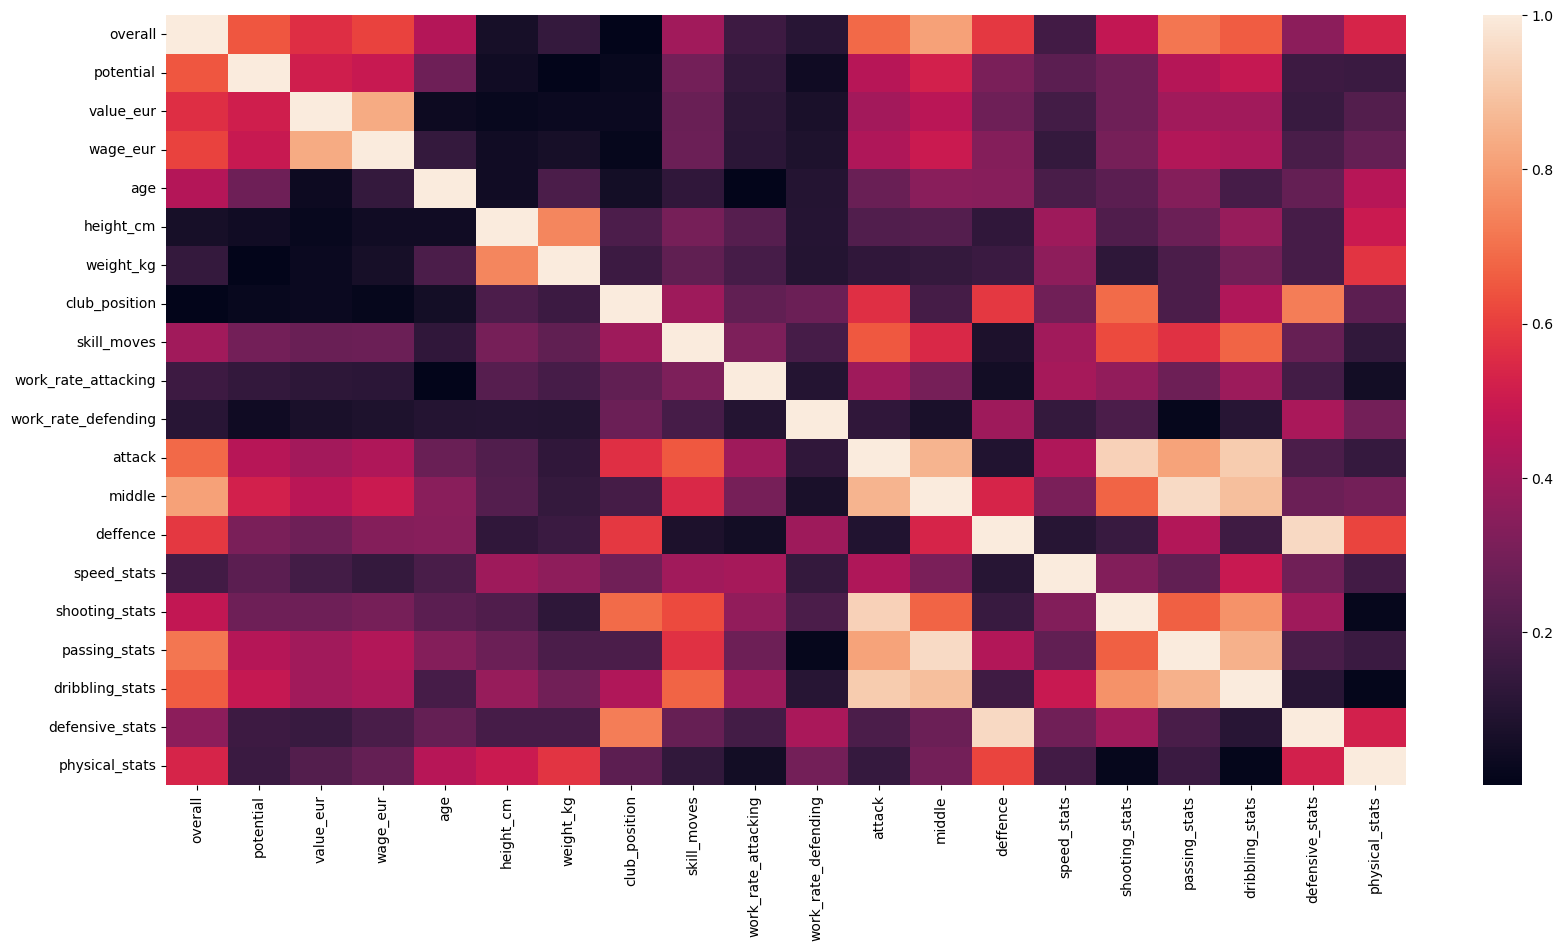

In [37]:
### Correlation Matrix - Made into a comment after no longer needed to run ###
corr_matrix = df_cleaned.corr().abs()
corr_matrix
print('\n')
print((corr_matrix['club_position']> 0.2).sum())

plt.figure(figsize=(20,10))
ax = sns.heatmap(corr_matrix)
plt.show()



In [38]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16305 entries, 0 to 18349
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   overall              16305 non-null  int64  
 1   potential            16305 non-null  int64  
 2   value_eur            16305 non-null  float64
 3   wage_eur             16305 non-null  float64
 4   age                  16305 non-null  int64  
 5   height_cm            16305 non-null  int64  
 6   weight_kg            16305 non-null  int64  
 7   club_position        16305 non-null  int64  
 8   skill_moves          16305 non-null  int64  
 9   work_rate_attacking  16305 non-null  int64  
 10  work_rate_defending  16305 non-null  int64  
 11  attack               16305 non-null  float64
 12  middle               16305 non-null  float64
 13  deffence             16305 non-null  float64
 14  speed_stats          16305 non-null  int64  
 15  shooting_stats       16305 non-null  int6

# modeling

In [39]:
import warnings
warnings.filterwarnings('always')

In [40]:
target = 'club_position'

X = df_cleaned.drop(target, axis=1)

y = df_cleaned[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [49]:
classifiers = []

model1 = tree.DecisionTreeClassifier()
classifiers.append(model1)

model2 = RandomForestClassifier()
classifiers.append(model2)

model3= naive_bayes.GaussianNB()
classifiers.append(model3)

model4 = KNeighborsClassifier(n_neighbors=16) #Based on Error Rate K value
classifiers.append(model4)

model5 = LogisticRegression(solver='lbfgs', max_iter=1000)
classifiers.append(model5)



In [42]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [43]:
df_cleaned[target].unique()

array([5, 3, 4, 1, 2])

In [57]:
# Assuming y_train and y_test contain your target variables
y_train_adjusted = y_train - 1  # Subtract 1 to start classes from 0
y_test_adjusted = y_test - 1    # Subtract 1 to start classes from 0

model6 = XGBClassifier(
    learning_rate=0.3,
    n_estimators=500,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    min_child_weight=1,
    reg_alpha=0.1,
    reg_lambda=1,
    booster='gbtree',  # 'gbtree' is the default booster
    random_state=42)
model6.fit(X_train, y_train_adjusted)
y_pred = model6.predict(X_test)
accu = accuracy_score(y_test_adjusted, y_pred)
print('The Accuracy of %s is %s' % ("XgBoost", accu))


The Accuracy of XgBoost is 0.8160073597056118


In [50]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accu = accuracy_score(y_test, y_pred)
    print('The Accuracy of %s is %s' %(clf,accu))
    conmat = confusion_matrix(y_test, y_pred)
    print('The Confusion Matrix of %s is %s\n' %(clf,conmat))
    target_names = ['class 1', 'class 2', 'class 3',  'class 4', 'class 5']

    print(classification_report(y_test, y_pred, target_names=target_names))



The Accuracy of DecisionTreeClassifier() is 0.6755596442808954
The Confusion Matrix of DecisionTreeClassifier() is [[489  59  45   2   0]
 [ 68 396 117  60  25]
 [ 83 129 674 107  28]
 [  2  73  91 223  57]
 [  1  19  35  57 421]]

              precision    recall  f1-score   support

     class 1       0.76      0.82      0.79       595
     class 2       0.59      0.59      0.59       666
     class 3       0.70      0.66      0.68      1021
     class 4       0.50      0.50      0.50       446
     class 5       0.79      0.79      0.79       533

    accuracy                           0.68      3261
   macro avg       0.67      0.67      0.67      3261
weighted avg       0.68      0.68      0.68      3261

The Accuracy of RandomForestClassifier() is 0.7859552284575284
The Confusion Matrix of RandomForestClassifier() is [[538  32  25   0   0]
 [ 50 446  97  58  15]
 [ 48  56 841  63  13]
 [  0  25  91 284  46]
 [  0   1  23  55 454]]

              precision    recall  f1-score   s

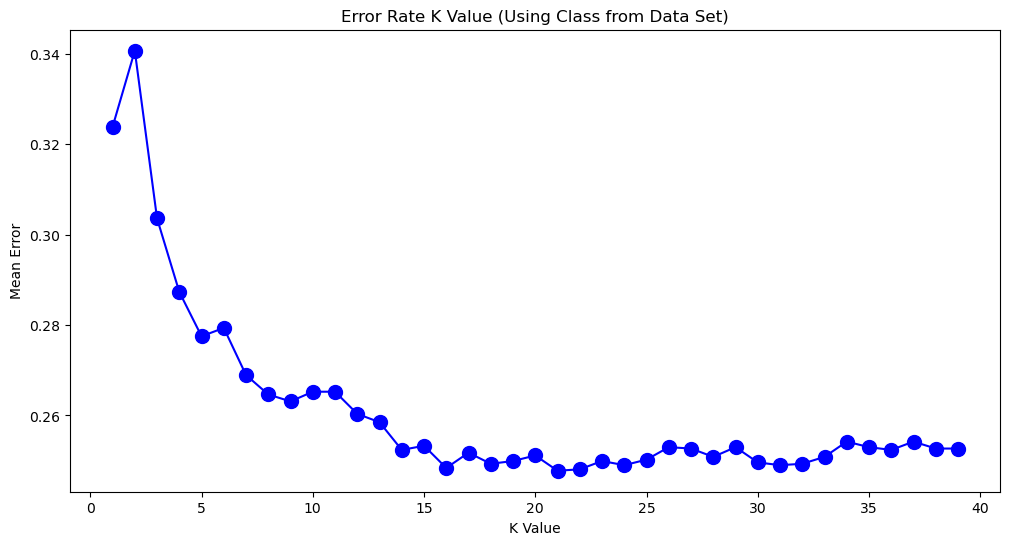

In [46]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='blue', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value (Using Class from Data Set)')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [ ]:
"""
Author: William Gemba

This is a file to perform Data Mining Tasks of the cleaned FIFA 18 Player Data Set.

Python 3.8.6
"""
import os
import numpy as np
import scipy.cluster.hierarchy as shc
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode
import plotly.io as pio
import cufflinks as cf
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from  sklearn.metrics import  accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree, naive_bayes

warnings.filterwarnings('ignore')

init_notebook_mode(connected=True)
cf.go_offline()



classifiers = []

model1 = tree.DecisionTreeClassifier()
classifiers.append(model1)

model2 = RandomForestClassifier()
classifiers.append(model2)

model3= naive_bayes.GaussianNB()
classifiers.append(model3)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model4 = KNeighborsClassifier(n_neighbors=8) #Based on Error Rate K value
model4.fit(X_train, y_train)
classifiers.append(model4)

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accu = accuracy_score(y_test, y_pred)
    print('The Accuracy of %s is %s' %(clf,accu))
    conmat = confusion_matrix(y_test, y_pred)
    print('The Confusion Matrix of %s is %s\n' %(clf,conmat))
    target_names = ['class 0', 'class 1', 'class 2']
    print(classification_report(y_test, y_pred, target_names=target_names))

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='blue', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value (Using Class from Data Set)')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()


""" Classify on Clusters"""
### KMeans ###

df_kmeans = pd.read_csv('Project_v2/PostFeatureReducion/FIFA18playerdata_CLEANED_top250Players_kMeaned_postreduc.csv', index_col='Name')

df_kmeans.head()
df_kmeans.info()

dfkmeans3 = df_kmeans.filter(['Finishing', 'Volleys', 'Dribbling', 'ShotPower', 'LongShots', 'Interceptions', 'Positioning', 'Vision',
'Penalties', 'Marking', 'StandingTackle', 'SlidingTackle', 'kMeansClusters(k=3)'], axis=1)
dfkmeans4 = df_kmeans.filter(['Finishing', 'Volleys', 'Dribbling', 'ShotPower', 'LongShots', 'Interceptions', 'Positioning', 'Vision', # Never Used
'Penalties', 'Marking', 'StandingTackle', 'SlidingTackle', 'kMeansClusters(k=4)'], axis=1)
dfkmeans5 = df_kmeans.filter(['Finishing', 'Volleys', 'Dribbling', 'ShotPower', 'LongShots', 'Interceptions', 'Positioning', 'Vision', # Never Used
'Penalties', 'Marking', 'StandingTackle', 'SlidingTackle', 'kMeansClusters(k=5)'], axis=1)

Xk3 = dfkmeans3[['Finishing', 'Volleys', 'Dribbling', 'ShotPower', 'LongShots', 'Interceptions', 'Positioning', 'Vision',
'Penalties', 'Marking', 'StandingTackle', 'SlidingTackle']]

yk3 = dfkmeans3['kMeansClusters(k=3)']

Xk3_train, Xk3_test, yk3_train, yk3_test = train_test_split(Xk3,yk3, test_size=0.2, random_state=42)

classifiers_kM = []

modelkM1 = tree.DecisionTreeClassifier()
classifiers_kM.append(modelkM1)

modelkM2 = RandomForestClassifier()
classifiers_kM.append(modelkM2)

modelkM3= naive_bayes.GaussianNB()
classifiers_kM.append(modelkM3)

scaler.fit(Xk3_train)
Xk3_train = scaler.transform(Xk3_train)
Xk3_test = scaler.transform(Xk3_test)
modelkM4 = KNeighborsClassifier(n_neighbors=6) #Based on Error Rate K value
modelkM4.fit(Xk3_train, yk3_train)
classifiers_kM.append(modelkM4)

for clf in classifiers_kM:
    clf.fit(Xk3_train, yk3_train)
    yk3_pred = clf.predict(Xk3_test)
    accukM = accuracy_score(yk3_test, yk3_pred)
    print('The Accuracy of %s is %s' %(clf,accukM))
    conmatkM = confusion_matrix(yk3_test, yk3_pred)
    print('The Confusion Matrix of %s is %s\n' %(clf,conmatkM))
    target_names_kM = ['class 0', 'class 1', 'class 2']
    print(classification_report(yk3_test, yk3_pred, target_names=target_names_kM))

    errorkM = []

    # Calculating error for K values between 1 and 40
    for i in range(1, 40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(Xk3_train, yk3_train)
        pred_i = knn.predict(Xk3_test)
        errorkM.append(np.mean(pred_i != yk3_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), errorkM, color='blue', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value ((Using Class from kMeans Clustering))')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

### Agglomerative Hierarchical MAX ###

df_agglo = pd.read_csv('Project_v2/Hierarchical Clustering/FIFA18playerdata_CLEANED_top250Players_HierarchicalAVG_postreduc.csv', index_col='Name')

df_agglo.head()
df_agglo.info()

df_agglo = df_agglo.filter(['Finishing', 'Volleys', 'Dribbling', 'ShotPower', 'LongShots', 'Interceptions', 'Positioning', 'Vision',
'Penalties', 'Marking', 'StandingTackle', 'SlidingTackle', 'Hierarchical_Clustering_AVG'], axis=1)

Xa = df_agglo[['Finishing', 'Volleys', 'Dribbling', 'ShotPower', 'LongShots', 'Interceptions', 'Positioning', 'Vision',
'Penalties', 'Marking', 'StandingTackle', 'SlidingTackle']]

ya = df_agglo['Hierarchical_Clustering_AVG']

Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa,ya, test_size=0.2, random_state=42)

classifiers_agglo = []

model1a = tree.DecisionTreeClassifier()
classifiers_agglo.append(model1a)

model2a = RandomForestClassifier()
classifiers_agglo.append(model2a)

model3a= naive_bayes.GaussianNB()
classifiers_agglo.append(model3a)

scaler.fit(Xa_train)
Xa_train = scaler.transform(Xa_train)
Xa_test = scaler.transform(Xa_test)
model4a = KNeighborsClassifier(n_neighbors=6) #Based on Error Rate K value
model4a.fit(Xa_train, ya_train)
classifiers_agglo.append(model4a)

for clf in classifiers_agglo:
    clf.fit(Xa_train, ya_train)
    ya_pred = clf.predict(Xa_test)
    accu_a = accuracy_score(ya_test, ya_pred)
    print('The Accuracy of %s is %s' %(clf,accu_a))
    conmat_a = confusion_matrix(ya_test, ya_pred)
    print('The Confusion Matrix of %s is %s\n' %(clf,conmat_a))
    target_names_a = ['class 0', 'class 1', 'class 2']
    print(classification_report(ya_test, ya_pred, target_names=target_names_a))

    error_a = []

    # Calculating error for K values between 1 and 40
    for i in range(1, 40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(Xa_train, ya_train)
        pred_i = knn.predict(Xa_test)
        error_a.append(np.mean(pred_i != ya_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error_a, color='blue', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value (Using Class from Hierarchical Clustering (AVG))')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()


In [38]:
df_processed = pd.read_csv('Fifa24PLayers_cleaned_fss.csv')

In [42]:
df_processed.head()

,overall,value_eur,age,club_team_id,league_id,nationality_id,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_curve,skill_fk_accuracy,skill_long_passing,movement_agility,movement_reactions,power_shot_power,power_jumping,power_stamina,power_strength,mentality_aggression,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,st,cm,rm,cb,rb,work_rate_attacking,work_rate_defending
0,91,23.623864,24,73.0,22.0,18,4,5,5,97.0,90.0,80.0,92.0,36.0,78.0,78,73,86,84,80,69,71,93,93,90,88,88,77,64,93,83,84,88.0,13,5,7,11,6,15.0,2.575918,1.915483,2.288917,0.084425,0.657030,2,0
1,91,24.086656,22,10.0,12.0,36,3,3,5,89.0,93.0,66.0,80.0,45.0,88.0,47,83,77,90,77,62,53,76,94,94,93,76,93,87,96,74,84,87.0,7,14,13,11,7,15.0,2.575918,1.389974,1.582639,0.619158,0.446103,2,1
2,91,13.244102,32,10.0,12.0,7,5,4,5,72.0,88.0,94.0,87.0,65.0,78.0,95,55,94,83,92,83,94,74,92,92,72,88,74,75,88,95,83,88.0,15,13,5,10,13,15.0,2.063483,2.591136,2.218290,1.153891,1.500739,2,1
3,90,5.046074,36,112893.0,2.0,52,4,4,5,80.0,87.0,90.0,94.0,33.0,64.0,83,60,91,86,93,93,90,91,88,83,71,70,68,44,91,92,75,96.0,6,11,15,14,8,15.0,2.209893,2.215773,2.288917,-0.249782,0.375793,0,0
4,90,6.368336,35,607.0,1.0,18,4,4,5,79.0,88.0,83.0,87.0,39.0,78.0,75,90,89,88,82,73,76,77,92,87,85,82,82,63,92,90,85,90.0,13,11,5,5,7,15.0,2.429508,1.990555,2.077034,0.151267,0.446103,1,1


In [43]:
df_processed.columns

Index(['overall', 'value_eur', 'age', 'club_team_id', 'league_id',
       'nationality_id', 'weak_foot', 'skill_moves',
       'international_reputation', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_curve', 'skill_fk_accuracy',
       'skill_long_passing', 'movement_agility', 'movement_reactions',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'mentality_aggression', 'mentality_positioning', 'mentality_vision',
       'mentality_penalties', 'mentality_composure', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed',
       'st', 'cm', 'rm', 'cb', 'rb', 'work_rate_attacking',
       'work_rate_defending'],
      dtype='object')

In [65]:
df_classification = pd.read_csv('FIFA18playerdata_CLEANED.csv') 

In [66]:
df_classification

,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value (Euros),Weekly Wage (Euros),Height (cm),Weight (lbs),Position Grouping
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5.0,4.0,4.0,Medium/ Medium,Lean,RF,10.0,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,110500000.0,565000.0,170.18,159,FWD
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5.0,4.0,5.0,High/ Low,Normal,ST,7.0,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,77000000.0,405000.0,187.96,183,FWD
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5.0,5.0,5.0,High/ Medium,Lean,LW,10.0,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,118500000.0,290000.0,175.26,150,MID
3,De Gea,27,Spain,91,93,Manchester United,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,72000000.0,260000.0,193.04,168,GK
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,102000000.0,355000.0,180.34,154,MID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18142,J. Lundstram,19,England,47,65,Crewe Alexandra,Right,1.0,2.0,2.0,Medium/ Medium,Lean,CM,22.0,44,44,44,46,46,46,46,46,47,47,47,46,47,47,47,46,46,47,47,47,46,47,47,47,47,47,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,60000.0,1000.0,175.26,134,MID
18143,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,Right,1.0,2.0,2.0,Medium/ Medium,Normal,ST,21.0,47,47,47,41,44,44,44,41,42,42,42,40,37,37,37,40,32,33,33,33,32,31,34,34,34,31,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,60000.0,1000.0,190.50,170,FWD
18144,B. Worman,16,England,47,67,Cambridge United,Right,1.0,3.0,2.0,Medium/ Medium,Normal,ST,33.0,47,47,47,47,48,48,48,47,46,46,46,46,40,40,40,46,36,32,32,32,36,35,30,30,30,35,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,60000.0,1000.0,172.72,148,FWD
18145,D. Walker-Rice,17,England,47,66,Tranmere

In [71]:
df_classification['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [48]:
df_classification = pd.read_csv('FIFA18playerdata_CLEANED_featurereduc.csv') 

In [83]:
df_classification.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Jersey Number',
       'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Value (Euros)', 'Weekly Wage (Euros)', 'Height (cm)', 'Weight (lbs)',
       'Position G

In [ ]:
"""
Author: William Gemba

This is a file to perform Data Mining Tasks of the cleaned FIFA 18 Player Data Set.

Python 3.8.6
"""
import os
import numpy as np
import scipy.cluster.hierarchy as shc
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode
import plotly.io as pio
import cufflinks as cf
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from  sklearn.metrics import  accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree, naive_bayes

warnings.filterwarnings('ignore')

init_notebook_mode(connected=True)
cf.go_offline()

### Set Plotly Renderer to a Default Value ###
pio.renderers.default = "browser"

### Set Display Options for Panda ###
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

os.chdir('<Insert PATH Here>')
df = pd.read_csv('FIFA18playerdata_CLEANED_featurereduc.csv', index_col='Name')

df.head()
df.info()

dfcopy = df.copy()
dfcopy = dfcopy.head(250)

X = dfcopy[['Finishing', 'Volleys', 'Dribbling', 'ShotPower', 'LongShots', 'Interceptions', 'Positioning', 'Vision',
'Penalties', 'Marking', 'StandingTackle', 'SlidingTackle']]

y = dfcopy['Position Grouping']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

classifiers = []

model1 = tree.DecisionTreeClassifier()
classifiers.append(model1)

model2 = RandomForestClassifier()
classifiers.append(model2)

model3= naive_bayes.GaussianNB()
classifiers.append(model3)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model4 = KNeighborsClassifier(n_neighbors=8) #Based on Error Rate K value
model4.fit(X_train, y_train)
classifiers.append(model4)

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accu = accuracy_score(y_test, y_pred)
    print('The Accuracy of %s is %s' %(clf,accu))
    conmat = confusion_matrix(y_test, y_pred)
    print('The Confusion Matrix of %s is %s\n' %(clf,conmat))
    target_names = ['class 0', 'class 1', 'class 2']
    print(classification_report(y_test, y_pred, target_names=target_names))

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='blue', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value (Using Class from Data Set)')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()


""" Classify on Clusters"""
### KMeans ###

df_kmeans = pd.read_csv('Project_v2/PostFeatureReducion/FIFA18playerdata_CLEANED_top250Players_kMeaned_postreduc.csv', index_col='Name')

df_kmeans.head()
df_kmeans.info()

dfkmeans3 = df_kmeans.filter(['Finishing', 'Volleys', 'Dribbling', 'ShotPower', 'LongShots', 'Interceptions', 'Positioning', 'Vision',
'Penalties', 'Marking', 'StandingTackle', 'SlidingTackle', 'kMeansClusters(k=3)'], axis=1)
dfkmeans4 = df_kmeans.filter(['Finishing', 'Volleys', 'Dribbling', 'ShotPower', 'LongShots', 'Interceptions', 'Positioning', 'Vision', # Never Used
'Penalties', 'Marking', 'StandingTackle', 'SlidingTackle', 'kMeansClusters(k=4)'], axis=1)
dfkmeans5 = df_kmeans.filter(['Finishing', 'Volleys', 'Dribbling', 'ShotPower', 'LongShots', 'Interceptions', 'Positioning', 'Vision', # Never Used
'Penalties', 'Marking', 'StandingTackle', 'SlidingTackle', 'kMeansClusters(k=5)'], axis=1)

Xk3 = dfkmeans3[['Finishing', 'Volleys', 'Dribbling', 'ShotPower', 'LongShots', 'Interceptions', 'Positioning', 'Vision',
'Penalties', 'Marking', 'StandingTackle', 'SlidingTackle']]

yk3 = dfkmeans3['kMeansClusters(k=3)']

Xk3_train, Xk3_test, yk3_train, yk3_test = train_test_split(Xk3,yk3, test_size=0.2, random_state=42)

classifiers_kM = []

modelkM1 = tree.DecisionTreeClassifier()
classifiers_kM.append(modelkM1)

modelkM2 = RandomForestClassifier()
classifiers_kM.append(modelkM2)

modelkM3= naive_bayes.GaussianNB()
classifiers_kM.append(modelkM3)

scaler.fit(Xk3_train)
Xk3_train = scaler.transform(Xk3_train)
Xk3_test = scaler.transform(Xk3_test)
modelkM4 = KNeighborsClassifier(n_neighbors=6) #Based on Error Rate K value
modelkM4.fit(Xk3_train, yk3_train)
classifiers_kM.append(modelkM4)

for clf in classifiers_kM:
    clf.fit(Xk3_train, yk3_train)
    yk3_pred = clf.predict(Xk3_test)
    accukM = accuracy_score(yk3_test, yk3_pred)
    print('The Accuracy of %s is %s' %(clf,accukM))
    conmatkM = confusion_matrix(yk3_test, yk3_pred)
    print('The Confusion Matrix of %s is %s\n' %(clf,conmatkM))
    target_names_kM = ['class 0', 'class 1', 'class 2']
    print(classification_report(yk3_test, yk3_pred, target_names=target_names_kM))

    errorkM = []

    # Calculating error for K values between 1 and 40
    for i in range(1, 40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(Xk3_train, yk3_train)
        pred_i = knn.predict(Xk3_test)
        errorkM.append(np.mean(pred_i != yk3_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), errorkM, color='blue', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value ((Using Class from kMeans Clustering))')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

### Agglomerative Hierarchical MAX ###

df_agglo = pd.read_csv('Project_v2/Hierarchical Clustering/FIFA18playerdata_CLEANED_top250Players_HierarchicalAVG_postreduc.csv', index_col='Name')

df_agglo.head()
df_agglo.info()

df_agglo = df_agglo.filter(['Finishing', 'Volleys', 'Dribbling', 'ShotPower', 'LongShots', 'Interceptions', 'Positioning', 'Vision',
'Penalties', 'Marking', 'StandingTackle', 'SlidingTackle', 'Hierarchical_Clustering_AVG'], axis=1)

Xa = df_agglo[['Finishing', 'Volleys', 'Dribbling', 'ShotPower', 'LongShots', 'Interceptions', 'Positioning', 'Vision',
'Penalties', 'Marking', 'StandingTackle', 'SlidingTackle']]

ya = df_agglo['Hierarchical_Clustering_AVG']

Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa,ya, test_size=0.2, random_state=42)

classifiers_agglo = []

model1a = tree.DecisionTreeClassifier()
classifiers_agglo.append(model1a)

model2a = RandomForestClassifier()
classifiers_agglo.append(model2a)

model3a= naive_bayes.GaussianNB()
classifiers_agglo.append(model3a)

scaler.fit(Xa_train)
Xa_train = scaler.transform(Xa_train)
Xa_test = scaler.transform(Xa_test)
model4a = KNeighborsClassifier(n_neighbors=6) #Based on Error Rate K value
model4a.fit(Xa_train, ya_train)
classifiers_agglo.append(model4a)

for clf in classifiers_agglo:
    clf.fit(Xa_train, ya_train)
    ya_pred = clf.predict(Xa_test)
    accu_a = accuracy_score(ya_test, ya_pred)
    print('The Accuracy of %s is %s' %(clf,accu_a))
    conmat_a = confusion_matrix(ya_test, ya_pred)
    print('The Confusion Matrix of %s is %s\n' %(clf,conmat_a))
    target_names_a = ['class 0', 'class 1', 'class 2']
    print(classification_report(ya_test, ya_pred, target_names=target_names_a))

    error_a = []

    # Calculating error for K values between 1 and 40
    for i in range(1, 40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(Xa_train, ya_train)
        pred_i = knn.predict(Xa_test)
        error_a.append(np.mean(pred_i != ya_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error_a, color='blue', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value (Using Class from Hierarchical Clustering (AVG))')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()
